## Homework Solution

In [59]:
import numpy as np
from sklearn.datasets import load_breast_cancer
import pandas as pd

dataset = load_breast_cancer()

In [60]:
X_data = dataset.data
Y_data = dataset.target

In [61]:
dfX = pd.DataFrame(X_data, columns=dataset.feature_names)
dfY = pd.DataFrame(Y_data, columns=['target'])

In [62]:
dfX.shape

(569, 30)

In [63]:
# Lets merge for visualisation purposes X and Y to see what happens if we plot the first two dimensions
df = dfX.copy()
df['target'] = dfY

In [65]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

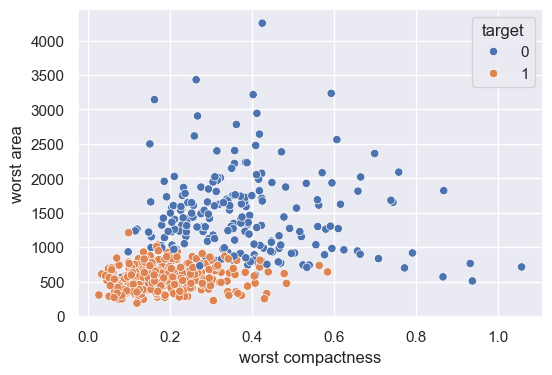

In [66]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6, 4)})
sns.scatterplot(df, x = 'mean radius', y = 'mean texture', hue='target');

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [71]:
X_std = StandardScaler().fit_transform(dfX)

X_rank = np.linalg.matrix_rank(np.cov(X_std))

X_rank

29

In [72]:
L_linspace = np.linspace(1, X_rank, 10, dtype=int)

L_linspace

array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 29])

In [73]:
RMSE = []

for index, L in enumerate(L_linspace):
    pca = PCA(n_components=L)
    X_transformed = pca.fit_transform(X_std)
    X_proj = pca.inverse_transform(X_transformed)
    RMSE.append(mean_squared_error(X_std, X_proj, squared=False))

In [75]:
pca.components_.shape

(29, 30)

In [76]:
eigenvalues = pca.explained_variance_
eigenvalues

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 3.12142606e-02,
       3.00256631e-02, 2.74877113e-02, 2.43836914e-02, 1.80867940e-02,
       1.55085271e-02, 8.19203712e-03, 6.91261258e-03, 1.59213600e-03,
       7.50121413e-04])

In [77]:
variance_explained = pca.explained_variance_ratio_
variance_explained

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05])

In [78]:
cum_variance_explained = pca.explained_variance_ratio_.cumsum()
cum_variance_explained 

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557])

Text(0.5, 1.0, 'Number of Latent dimensions: 6')

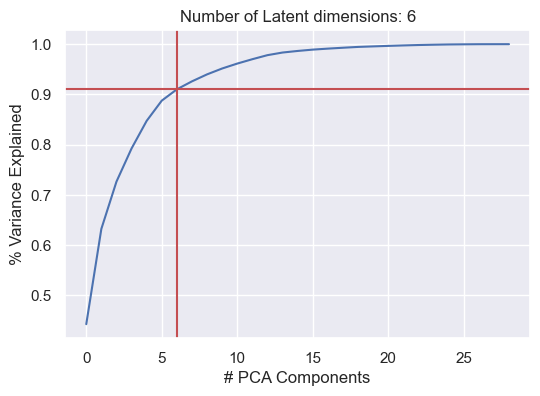

In [79]:
threshold = .9
idx = np.where(cum_variance_explained>threshold)[0][0]
exp_var = np.cumsum(pca.explained_variance_ratio_)

sns.lineplot(cum_variance_explained)
plt.axvline(idx, c='r')
plt.axhline(exp_var[idx], c='r')
plt.xlabel('# PCA Components')
plt.ylabel('% Variance Explained')
plt.title('Number of Latent dimensions: ' + str(idx))


Text(0, 0.5, 'RSME')

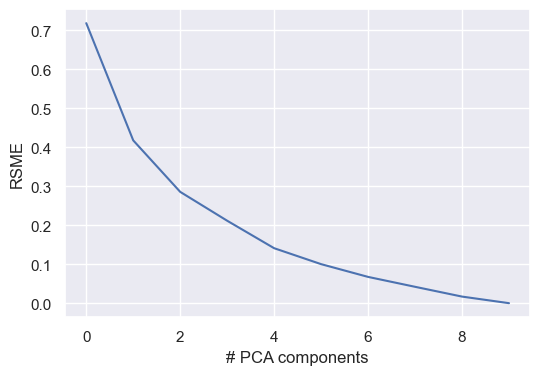

In [80]:
sns.lineplot(RMSE)
plt.xlabel('# PCA components')
plt.ylabel('RSME')

To determine which columns preserve the most variance, you can analyze the loadings of each feature in the principal components. The loadings represent the contribution of each original feature to the principal components. 

In [106]:
feature_names = dfX.columns

n_features = pca.n_features_in_

loadings = pca.components_

pc_list = [f'PC{i}' for i in list(range(1, n_features))]
pc_loadings = dict(zip(pc_list, loadings))

loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29
feature_names,,,,,,,,,,,,,,,,,,,,,
mean radius,0.218902,-0.233857,-0.008531,0.041409,0.037786,0.018741,-0.124088,-0.007452,-0.223110,0.095486,...,-0.049699,-0.068570,0.072929,-0.098553,0.182579,0.019226,-0.129476,-0.131527,0.211194,0.211460
mean texture,0.103725,-0.059706,0.064550,-0.603050,-0.049469,-0.032179,0.011400,0.130675,0.112699,0.240934,...,-0.244135,0.448369,0.094801,-0.000555,-0.098787,-0.084746,-0.024557,-0.017357,-0.000066,-0.010534
mean perimeter,0.227537,-0.215181,-0.009314,0.041983,0.037375,0.017308,-0.114477,-0.018687,-0.223739,0.086386,...,-0.017665,-0.069769,0.075160,-0.040245,0.116649,-0.027015,-0.125256,-0.115415,0.084338,0.383826
mean area,0.220995,-0.231077,0.028700,0.053434,0.010331,-0.001888,-0.051653,0.034674,-0.195586,0.074956,...,-0.090144,-0.018443,0.097566,0.007777,-0.069848,0.210041,0.362727,0.466612,-0.272508,-0.422795
mean smoothness,0.142590,0.186113,-0.104292,0.159383,-0.365089,-0.286374,-0.140669,-0.288975,0.006425,-0.069293,...,0.017101,-0.119492,0.063823,-0.020666,-0.068697,-0.028955,-0.037004,0.069690,0.001479,-0.003435
mean compactness,0.239285,0.151892,-0.074092,0.031795,0.011704,-0.014131,0.030918,-0.151396,-0.167841,0.012936,...,0.488686,0.192621,-0.098078,0.052360,0.104136,-0.396623,0.262808,0.097749,-0.005463,-0.041017
mean concavity,0.258400,0.060165,0.002734,0.019123,0.086375,-0.009344,-0.107520,-0.072827,0.040591,-0.135602,...,-0.033387,0.005572,-0.185212,0.324870,-0.044741,0.096977,-0.548876,0.364808,0.045539,-0.010015
mean concave points,0.260854,-0.034768,-0.025564,0.065336,-0.043861,-0.052050,-0.150482,-0.152322,-0.111971,0.008055,...,-0.235408,-0.009424,-0.311852,-0.051409,-0.084028,0.186452,0.387643,-0.454699,-0.008883,-0.004207
mean symmetry,0.138167,0.190349,-0.040240,0.067125,-0.305941,0.356458,-0.093891,-0.231531,0.256040,0.572069,...,0.026069,-0.086938,-0.018407,-0.051201,-0.019339,0.024584,-0.016044,-0.015165,0.001433,-0.007570


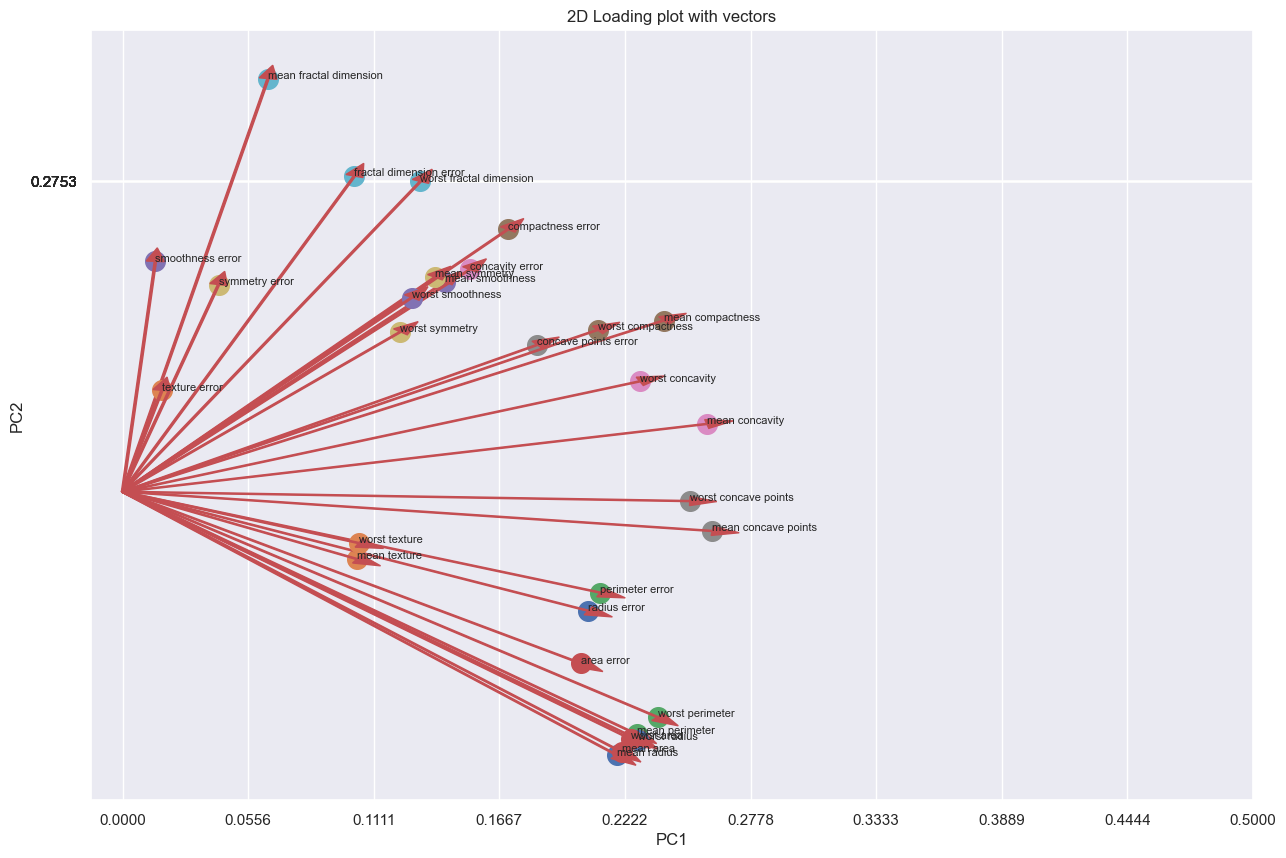

In [145]:
xs = loadings_df.iloc[:, 0]
ys = loadings_df.iloc[:, 1]
 
plt.figure(figsize=(15,10))
# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs.iloc[i], ys.iloc[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs.iloc[i], # length of the arrow along x
        ys.iloc[i], # length of the arrow along y
        color='r', 
        head_width=0.008
        )
    plt.text(xs.iloc[i], ys.iloc[i], varnames, fontsize=8)
 
# Define the axes
ymin = np.min(ys.iloc[i])
ymax = np.max(ys.iloc[i])

xticks = np.linspace(0, 0.5, num=10)
yticks = np.linspace(ymin, ymax, num=10)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show plot
plt.title('2D Loading plot with vectors')
plt.show()

In [83]:
sorted_components = sorted(enumerate(variance_explained), key=lambda x: x[1], reverse=True)
sorted_components

[(0, 0.44272025607526383),
 (1, 0.18971182044033064),
 (2, 0.09393163257431361),
 (3, 0.06602134915470156),
 (4, 0.05495768492346277),
 (5, 0.04024522039883344),
 (6, 0.02250733712982508),
 (7, 0.015887238000213275),
 (8, 0.013896493745591093),
 (9, 0.011689781894131496),
 (10, 0.00979718987598018),
 (11, 0.008705379007378831),
 (12, 0.008045249871967313),
 (13, 0.005233657454926348),
 (14, 0.0031378321676273947),
 (15, 0.0026620933651523163),
 (16, 0.0019799679253242734),
 (17, 0.0017539594502263619),
 (18, 0.0016492530592251682),
 (19, 0.0010386467483387016),
 (20, 0.000999096463700251),
 (21, 0.000914646751054346),
 (22, 0.0008113612588991058),
 (23, 0.0006018335666716714),
 (24, 0.0005160423791651867),
 (25, 0.00027258799547750075),
 (26, 0.00023001546250596454),
 (27, 5.297792903809431e-05),
 (28, 2.496010324687654e-05)]

## 2. Classification (with KNN for instance)

We are going to chose 6 as the number o latent dimensions that allows us to retain 90% of variance of the dataset.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#useful function that help us with the dataframes
def dataset_to_pandas(data, target): 
    data  = pd.DataFrame(data, columns=["X" + str(i + 1) for i in range(data.shape[1])])
    inputs = data.columns
    data["Y"] = target
    output = "Y"
    return data, inputs, output

In [ ]:
from sklearn.model_selection import train_test_split

data_std = StandardScaler().fit_transform(dataset.data)
XTR, XTS, YTR, YTS = train_test_split(data_std, dataset.target, test_size=0.2,random_state=1,  stratify = dataset.target)

In [ ]:
# Perform PCA in all datasets
subspace_dim = 6
pca5 = PCA(subspace_dim)
XTR_pca = pca5.fit_transform(XTR)
XTS_pca = pca5.fit_transform(XTS)

In [ ]:
accrcies = []

# Select the values of k
k_start = 2
k_stop = 50
k_step = 1

k_values = np.arange(start=k_start, stop=k_stop, step=k_step).astype("int")

# Loop through k values, fitting models and getting accuracies

train_data, train_inputs, train_outputs = dataset_to_pandas(XTR_pca, YTR)

for k in k_values:
    knn_pipe = Pipeline(steps=[('scaler', StandardScaler()), 
                        ('knn', KNeighborsClassifier(n_neighbors=k))])
    knn_pipe.fit(train_data[train_inputs], train_data[train_outputs])
    
    accrcies.append(knn_pipe.score(train_data[train_inputs], train_data[train_outputs]))

In [ ]:
accrcies = np.array(accrcies)
# Plot accuracies vs k
ax_acc = sns.scatterplot(x = k_values, y = accrcies)
sns.lineplot(x = k_values, y = accrcies, ax=ax_acc)
ax_acc.set(xlabel ="k (num. of neighbors)", ylabel = "Accuracy");       

In [ ]:
# We need to find the best value of k for classification. 
# We are going to create a pipeline that implements a grid search with 10-fold cross validation to try to estimate
# the optimal value of k in a KNN model for this dataset.

#We begin by defining the k values that we want to use. We will go from 3 to the training data size in 15 steps.

In [ ]:
k_values = np.arange(1, 50)
hyp_grid = {'knn__n_neighbors': k_values} 

In [ ]:
knn_pipe_hyper = Pipeline(steps=[('scaler', StandardScaler()), 
                        ('knn', KNeighborsClassifier())])

In [ ]:
from sklearn.model_selection import GridSearchCV

num_folds = 10

knn_gridCV = GridSearchCV(estimator=knn_pipe_hyper, 
                        param_grid=hyp_grid, 
                        cv=num_folds,
                        return_train_score=True)

In [ ]:
knn_gridCV.fit(XTR_pca, YTR) 

In [ ]:
knn_gridCV.best_params_

In [ ]:
knn_gridCV.score(XTR_pca, YTR), knn_gridCV.score(XTS_pca, YTS)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
model = knn_gridCV
fig = plt.figure(constrained_layout=True, figsize=(6, 2))
spec = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(spec[0, 0]);ax1.set_title('Training'); ax1.grid(False)
ax3 = fig.add_subplot(spec[0, 1]);ax3.set_title('Test'); ax3.grid(False)
ConfusionMatrixDisplay.from_estimator(model, XTR_pca, YTR, cmap="Greens", colorbar=False, ax=ax1, labels=[1, 0])
ConfusionMatrixDisplay.from_estimator(model, XTS_pca, YTS, cmap="Greens", colorbar=False, ax=ax3, labels=[1, 0])
plt.suptitle("Confusion Matrices")
plt.show(); 

In [ ]:
from sklearn.calibration import CalibrationDisplay
plt.figure(constrained_layout=False, figsize=(12, 12))
fig, ax = plt.subplots()
CalibrationDisplay.from_estimator(knn_gridCV, XTS_pca, YTS, n_bins=10,
                                  name="knn_pipe", pos_label = 1, ax=ax)

In [ ]:
from sklearn.metrics import RocCurveDisplay
fig = plt.figure(figsize=(12, 4))
spec = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(spec[0, 0]);ax1.set_title('Training')
ax2 = fig.add_subplot(spec[0, 1]);ax2.set_title('Test')
RocCurveDisplay.from_estimator(knn_gridCV, XTR_pca, YTR, plot_chance_level=True, ax=ax1)
RocCurveDisplay.from_estimator(knn_gridCV, XTS_pca, YTS, plot_chance_level=True, ax=ax2);
plt.show(); 

## 3. Assesing PCA Effectiviness

In [ ]:
plt.figure(figsize=(5,5))
sns.set_style("white")
plt_df = XTR_pca.copy()
plt_df = pd.DataFrame(plt_df)
plt_df["YTR"] = YTR
sns.pairplot(plt_df, hue="YTR", corner=True, height=2)

In [ ]:
feature_names = dfX.columns
n_features = pca5.n_features_in_
loadings = pca5.components_
pc_list = [f'PC{i}' for i in list(range(1, n_features))]
pc_loadings = dict(zip(pc_list, loadings))

loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

In [ ]:
accrcies = []

# Select the values of k
k_start = 2
k_stop = 50
k_step = 1

k_values = np.arange(start=k_start, stop=k_stop, step=k_step).astype("int")

# Loop through k values, fitting models and getting accuracies

train_data, train_inputs, train_outputs = dataset_to_pandas(XTR, YTR)

for k in k_values:
    knn_pipe = Pipeline(steps=[('scaler', StandardScaler()), 
                        ('knn', KNeighborsClassifier(n_neighbors=k))])
    knn_pipe.fit(train_data[train_inputs], train_data[train_outputs])
    
    accrcies.append(knn_pipe.score(train_data[train_inputs], train_data[train_outputs]))

In [ ]:
accrcies = np.array(accrcies)
# Plot accuracies vs k
ax_acc = sns.scatterplot(x = k_values, y = accrcies)
sns.lineplot(x = k_values, y = accrcies, ax=ax_acc)
ax_acc.set(xlabel ="k (num. of neighbors)", ylabel = "Accuracy");  

In [ ]:
k_values = np.arange(1, 50)
hyp_grid = {'knn__n_neighbors': k_values} 

In [ ]:
knn_pipe_hyper = Pipeline(steps=[('scaler', StandardScaler()), 
                        ('knn', KNeighborsClassifier())])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

num_folds = 10

knn_gridCV = GridSearchCV(estimator=knn_pipe_hyper, 
                        param_grid=hyp_grid, 
                        cv=num_folds,
                        return_train_score=True)

In [ ]:
knn_gridCV.fit(XTR, YTR) 

In [ ]:
knn_gridCV.best_params_

In [ ]:
knn_gridCV.score(XTR, YTR), knn_gridCV.score(XTS, YTS)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model = knn_gridCV
fig = plt.figure(constrained_layout=True, figsize=(6, 2))
spec = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(spec[0, 0]);ax1.set_title('Training'); ax1.grid(False)
ax3 = fig.add_subplot(spec[0, 1]);ax3.set_title('Test'); ax3.grid(False)
ConfusionMatrixDisplay.from_estimator(model, XTR, YTR, cmap="Greens", colorbar=False, ax=ax1, labels=[1, 0])
ConfusionMatrixDisplay.from_estimator(model, XTS, YTS, cmap="Greens", colorbar=False, ax=ax3, labels=[1, 0])
plt.suptitle("Confusion Matrices")
plt.show(); 

In [ ]:
from sklearn.calibration import CalibrationDisplay
plt.figure(constrained_layout=False, figsize=(12, 12))
fig, ax = plt.subplots()
CalibrationDisplay.from_estimator(knn_gridCV, XTS, YTS, n_bins=10,
                                  name="knn_pipe", pos_label = 1, ax=ax)

In [ ]:
from sklearn.metrics import RocCurveDisplay
fig = plt.figure(figsize=(12, 4))
spec = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(spec[0, 0]);ax1.set_title('Training')
ax2 = fig.add_subplot(spec[0, 1]);ax2.set_title('Test')
RocCurveDisplay.from_estimator(knn_gridCV, XTR, YTR, plot_chance_level=True, ax=ax1)
RocCurveDisplay.from_estimator(knn_gridCV, XTS, YTS, plot_chance_level=True, ax=ax2);
plt.show(); 

## 3. PCA to select components 

In [146]:
dfX.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [153]:
x = dfX[['worst concave points', 'mean fractal dimension']]
dfX_reduced = x.assign(target=dfY)
dfX_reduced.head()

,worst concave points,mean fractal dimension,target
0,0.2654,0.07871,0
1,0.1860,0.05667,0
2,0.2430,0.05999,0
3,0.2575,0.09744,0
4,0.1625,0.05883,0


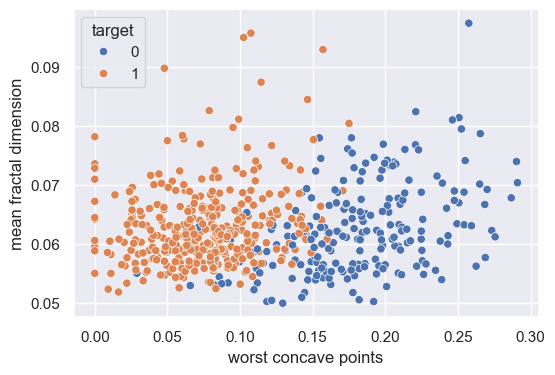

In [155]:
sns.set(rc={'figure.figsize':(6, 4)})
sns.scatterplot(dfX_reduced, x = 'worst concave points', y = 'mean fractal dimension', hue='target');

In [157]:
XTR, XTS, YTR, YTS = train_test_split(x, dfY, test_size=0.2,random_state=1,  stratify = dataset.target)


In [158]:
k_values = np.arange(1, 50)
hyp_grid = {'knn__n_neighbors': k_values} 
knn_pipe_hyper = Pipeline(steps=[('scaler', StandardScaler()), 
                        ('knn', KNeighborsClassifier())])

In [159]:
num_folds = 10

knn_gridCV = GridSearchCV(estimator=knn_pipe_hyper, 
                        param_grid=hyp_grid, 
                        cv=num_folds,
                        return_train_score=True)

In [164]:
knn_gridCV.fit(XTR, YTR.values.ravel()) 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             return_train_score=True)

In [165]:
knn_gridCV.best_params_

{'knn__n_neighbors': 15}

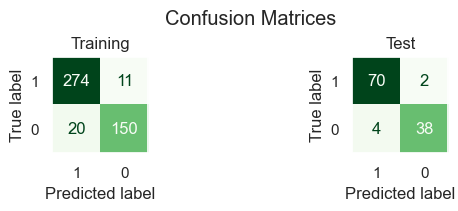

In [167]:
model = knn_gridCV
fig = plt.figure(constrained_layout=True, figsize=(6, 2))
spec = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(spec[0, 0]); ax1.set_title('Training'); ax1.grid(False)
ax3 = fig.add_subplot(spec[0, 1]); ax3.set_title('Test'); ax3.grid(False)
ConfusionMatrixDisplay.from_estimator(model, XTR, YTR, cmap="Greens", colorbar=False, ax=ax1, labels=[1, 0])
ConfusionMatrixDisplay.from_estimator(model, XTS, YTS, cmap="Greens", colorbar=False, ax=ax3, labels=[1, 0])
plt.suptitle("Confusion Matrices")
plt.show(); 

<Figure size 1200x1200 with 0 Axes>

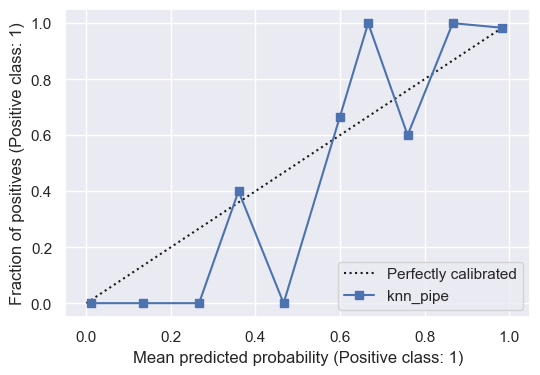

In [170]:
plt.figure(constrained_layout=False, figsize=(12, 12))
fig, ax = plt.subplots()
CalibrationDisplay.from_estimator(knn_gridCV, XTS, YTS, n_bins=10, name="knn_pipe", pos_label = 1, ax=ax)

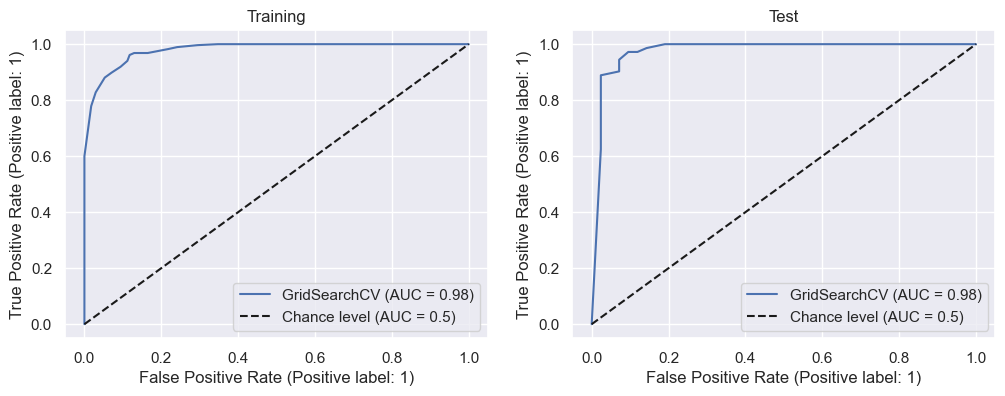

In [172]:
fig = plt.figure(figsize=(12, 4))
spec = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(spec[0, 0]);ax1.set_title('Training')
ax2 = fig.add_subplot(spec[0, 1]);ax2.set_title('Test')
RocCurveDisplay.from_estimator(knn_gridCV, XTR, YTR, plot_chance_level=True, ax=ax1)
RocCurveDisplay.from_estimator(knn_gridCV, XTS, YTS, plot_chance_level=True, ax=ax2);
plt.show(); 